In [ ]:
# Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from random import sample

In [ ]:
# Load the HRM dataset
hrm = pd.read_csv('/content/hr_analysis.csv')

In [ ]:
hrm.head()


,number_project,average_monthly_hours,salary,satisfaction_level,work_accident,left,time_spend_company,sales,promotion_last_5years,Training Hours,commute_distance,overtime_hours
0,5,164,medium,0.41,1,0,3,sales,0,16,32,27
1,5,200,medium,0.43,1,0,1,support,0,18,31,27
2,6,225,medium,0.32,1,1,2,sales,0,16,35,23
3,5,198,medium,0.38,1,1,1,hr,0,15,33,29
4,3,153,high,0.62,0,0,3,management,0,25,22,25


In [ ]:
# Check the structure of the dataset
print(hrm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_project         2121 non-null   int64  
 1   average_monthly_hours  2121 non-null   int64  
 2   salary                 2121 non-null   object 
 3   satisfaction_level     2121 non-null   float64
 4   work_accident          2121 non-null   int64  
 5   left                   2121 non-null   int64  
 6   time_spend_company     2121 non-null   int64  
 7   sales                  2121 non-null   object 
 8   promotion_last_5years  2121 non-null   int64  
 9   Training Hours         2121 non-null   int64  
 10  commute_distance       2121 non-null   int64  
 11  overtime_hours         2121 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 199.0+ KB
None


In [ ]:
data= pd.DataFrame(hrm.loc[hrm.duplicated()].count())
data.columns = ['Total Duplicate']
data

,Total Duplicate
number_project,12
average_monthly_hours,12
salary,12
satisfaction_level,12
work_accident,12
left,12
time_spend_company,12
sales,12
promotion_last_5years,12
Training Hours,12


In [ ]:
hrm.drop_duplicates(inplace=True)
data= pd.DataFrame(hrm.loc[hrm.duplicated()].count())
data.columns = ['Total Duplicate']
data

,Total Duplicate
number_project,0
average_monthly_hours,0
salary,0
satisfaction_level,0
work_accident,0
left,0
time_spend_company,0
sales,0
promotion_last_5years,0
Training Hours,0


In [ ]:
# Check for missing values
print(hrm.isna().sum())

number_project           0
average_monthly_hours    0
salary                   0
satisfaction_level       0
work_accident            0
left                     0
time_spend_company       0
sales                    0
promotion_last_5years    0
Training Hours           0
commute_distance         0
overtime_hours           0
dtype: int64


In [ ]:
print(hrm.describe())

       number_project  average_monthly_hours  satisfaction_level  \
count     2109.000000            2109.000000         2109.000000   
mean         3.903272             180.467046            0.498122   
std          1.340556              29.465905            0.178828   
min          2.000000             130.000000            0.100000   
25%          3.000000             154.000000            0.370000   
50%          4.000000             181.000000            0.500000   
75%          5.000000             206.000000            0.630000   
max          6.000000             242.000000            0.900000   

       work_accident         left  time_spend_company  promotion_last_5years  \
count    2109.000000  2109.000000         2109.000000            2109.000000   
mean        0.370792     0.427691            2.339497               0.083926   
std         0.483131     0.494861            1.266058               0.277343   
min         0.000000     0.000000            1.000000              

In [ ]:
print(hrm.groupby('salary')['satisfaction_level'].describe())

        count      mean       std   min   25%   50%   75%   max
salary                                                         
high    509.0  0.686621  0.114891  0.51  0.58  0.69  0.78  0.90
low     768.0  0.390065  0.166618  0.10  0.25  0.38  0.52  0.75
medium  832.0  0.482548  0.120961  0.21  0.39  0.47  0.57  0.75


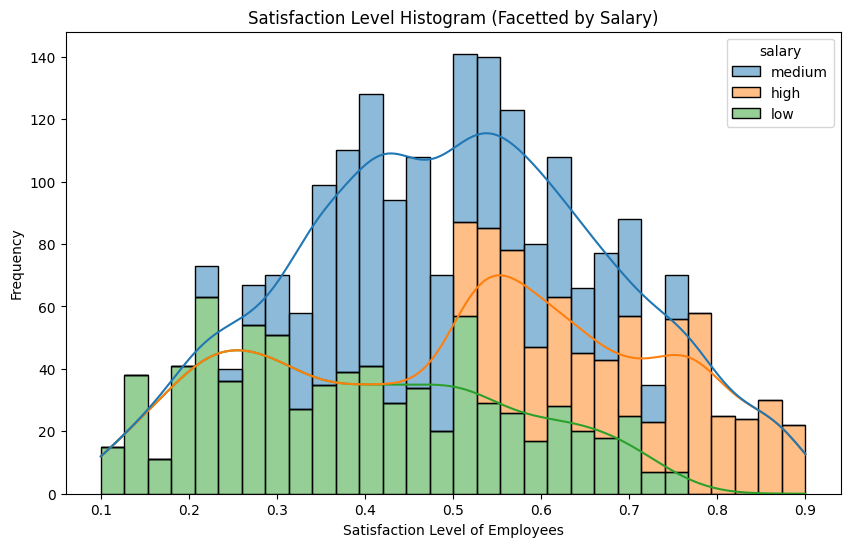

In [ ]:
# Facetted histograms by salary
plt.figure(figsize=(10, 6))
sns.histplot(data=hrm, x='satisfaction_level', bins=30, color='red', kde=True, hue='salary', multiple='stack')
plt.title("Satisfaction Level Histogram (Facetted by Salary)")
plt.xlabel("Satisfaction Level of Employees")
plt.ylabel("Frequency")
plt.show()

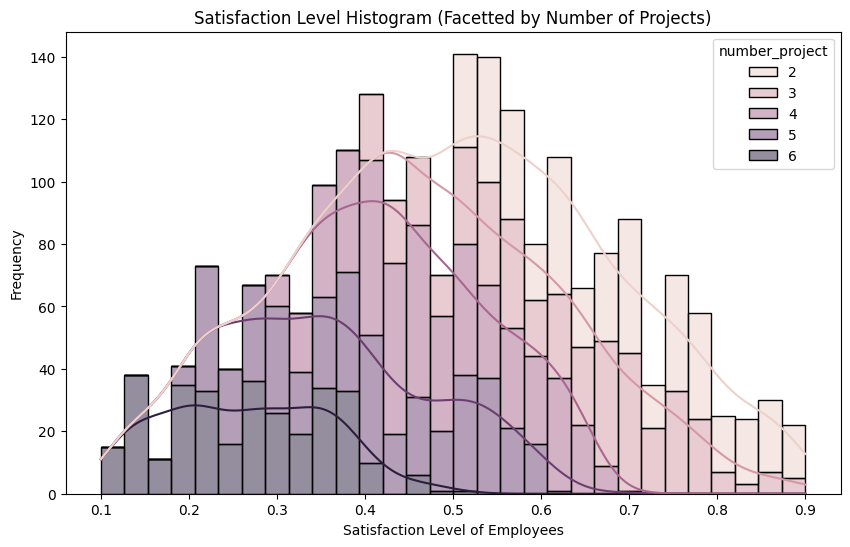

In [ ]:
# Facetted histograms by number of projects
plt.figure(figsize=(10, 6))
sns.histplot(data=hrm, x='satisfaction_level', bins=30, kde=True, hue='number_project', multiple='stack')
plt.title("Satisfaction Level Histogram (Facetted by Number of Projects)")
plt.xlabel("Satisfaction Level of Employees")
plt.ylabel("Frequency")
plt.show()

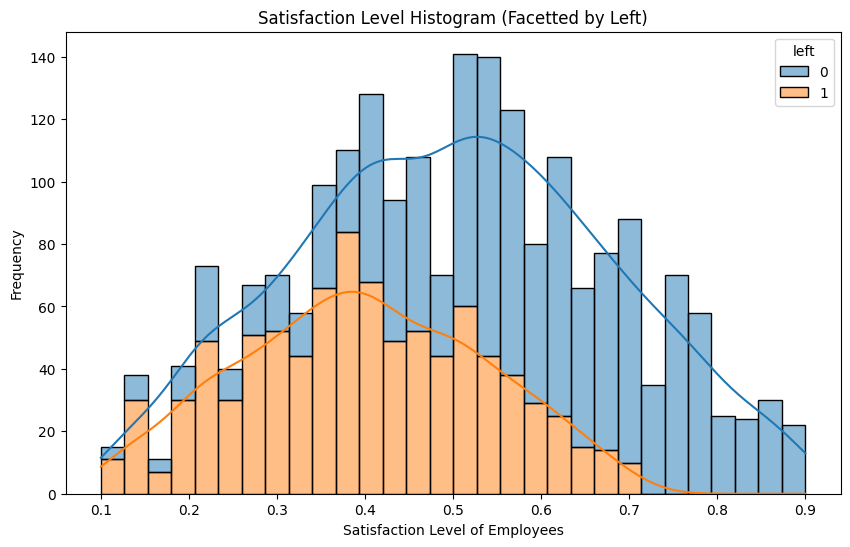

In [ ]:
# Facetted histograms by left or not
plt.figure(figsize=(10, 6))
sns.histplot(data=hrm, x='satisfaction_level', bins=30, color='red', kde=True, hue='left', multiple='stack')
plt.title("Satisfaction Level Histogram (Facetted by Left)")
plt.xlabel("Satisfaction Level of Employees")
plt.ylabel("Frequency")
plt.show()


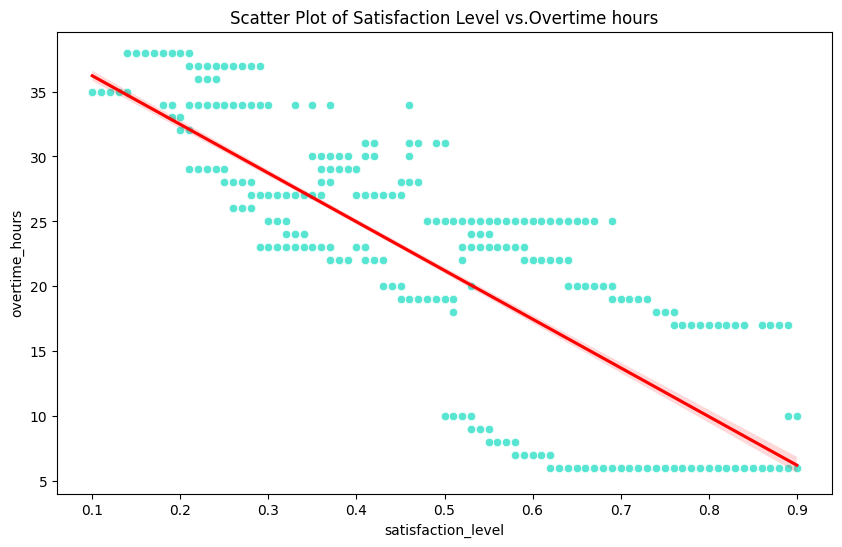

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hrm['satisfaction_level'], y=hrm['overtime_hours'],c="#58E6D3")
plt.xlabel("Satisfaction Level")
plt.ylabel("Cvertime hours")
plt.title("Scatter Plot of Satisfaction Level vs.Overtime hours")
sns.regplot(x=hrm['satisfaction_level'], y=hrm['overtime_hours'], scatter=False, color='r')
plt.show()


<ipython-input-18-8076e5a82666>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="overtime_hours", y="number_project", data=hrm, palette="viridis")


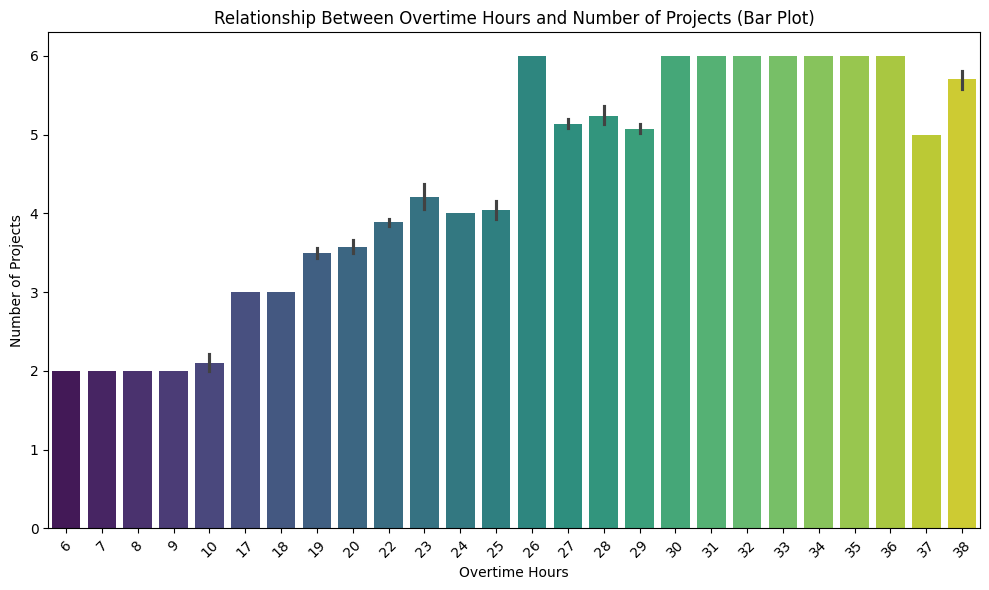

In [ ]:
#bar plot to visualize the relationship between overtime_hours and number_project
plt.figure(figsize=(10, 6))
sns.barplot(x="overtime_hours", y="number_project", data=hrm, palette="viridis")
plt.xlabel("Overtime Hours")
plt.ylabel("Number of Projects")
plt.title("Relationship Between Overtime Hours and Number of Projects (Bar Plot)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Cross-tabulation of left vs salary
print(pd.crosstab(hrm['left'], hrm['salary']))

# Cross-tabulation of left vs number_project
print(pd.crosstab(hrm['left'], hrm['number_project']))

salary  high  low  medium
left                     
0        407  363     437
1        102  405     395
number_project    2    3    4    5    6
left                                   
0               421  411  163  134   78
1                 0   18  343  305  236


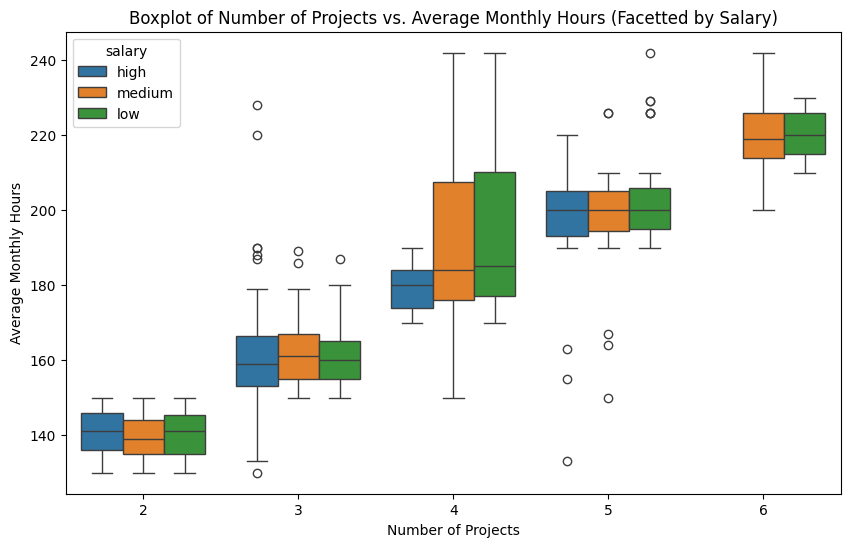

In [ ]:
# Facetted boxplots by salary
plt.figure(figsize=(10, 6))
sns.boxplot(data=hrm, x='number_project', y='average_monthly_hours', hue='salary')
plt.xlabel("Number of Projects")
plt.ylabel("Average Monthly Hours")
plt.title("Boxplot of Number of Projects vs. Average Monthly Hours (Facetted by Salary)")
plt.show()


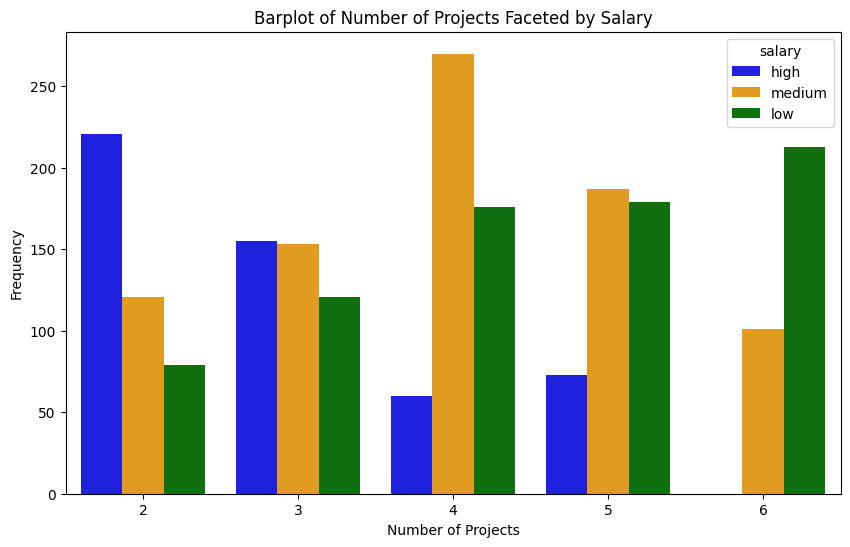

In [ ]:
# Facetted barplots by salary
plt.figure(figsize=(10, 6))
sns.countplot(data=hrm, x='number_project', hue='salary', palette=['blue', 'orange','green'])
plt.xlabel("Number of Projects")
plt.ylabel("Frequency")
plt.title("Barplot of Number of Projects Faceted by Salary")
plt.show()


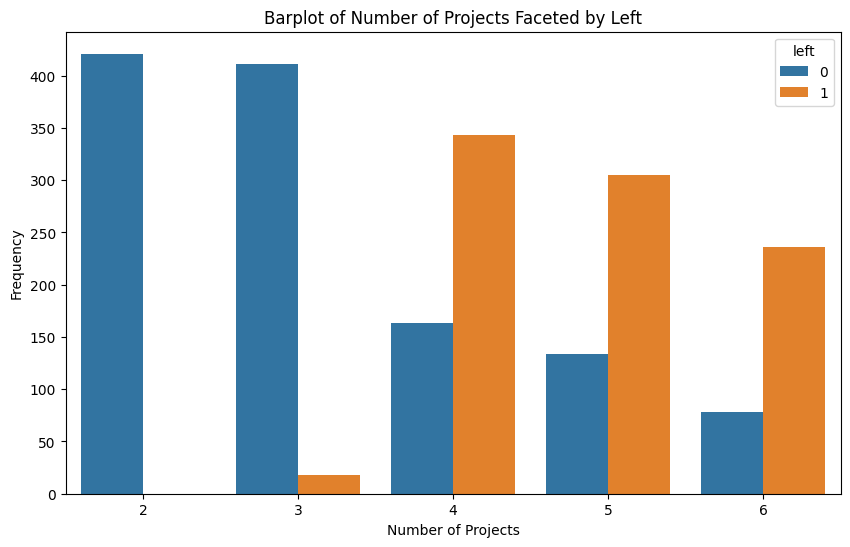

In [ ]:
# Facetted barplots by left or not
plt.figure(figsize=(10, 6))
sns.countplot(data=hrm, x='number_project', hue='left' )
plt.xlabel("Number of Projects")
plt.ylabel("Frequency")
plt.title("Barplot of Number of Projects Faceted by Left")
plt.show()

<ipython-input-23-3b739f9cf6b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hrm.corr()


                       number_project  average_monthly_hours  \
number_project               1.000000               0.909194   
average_monthly_hours        0.909194               1.000000   
satisfaction_level          -0.792965              -0.747189   
work_accident                0.519778               0.465382   
left                         0.605145               0.598276   
time_spend_company          -0.777234              -0.766306   
promotion_last_5years       -0.094265              -0.100347   
Training Hours              -0.081292              -0.073290   
commute_distance             0.757353               0.723897   
overtime_hours               0.877285               0.789808   

                       satisfaction_level  work_accident      left  \
number_project                  -0.792965       0.519778  0.605145   
average_monthly_hours           -0.747189       0.465382  0.598276   
satisfaction_level               1.000000      -0.462054 -0.488168   
work_accident  

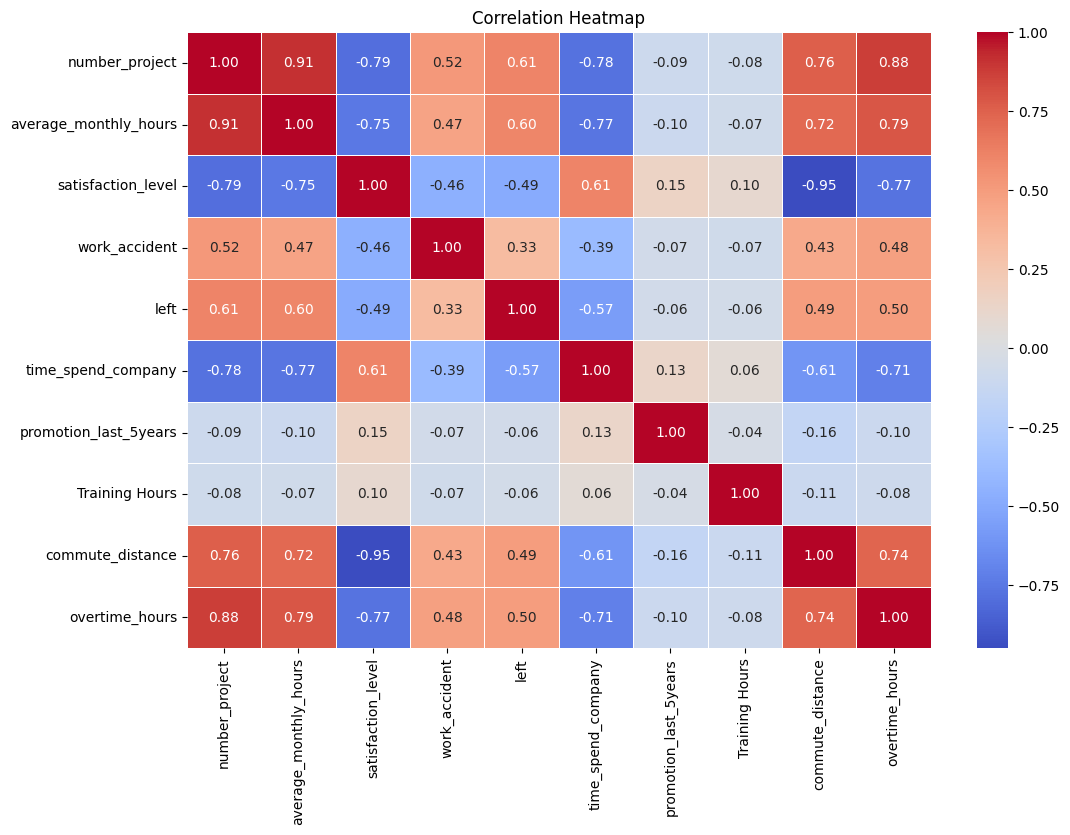

In [ ]:
correlation_matrix = hrm.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
hrm.groupby('left')['average_monthly_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,1207.0,165.231152,27.188558,130.0,144.00,158.0,182.0,242.0
1,902.0,200.854767,17.742891,160.0,186.25,201.0,216.0,242.0


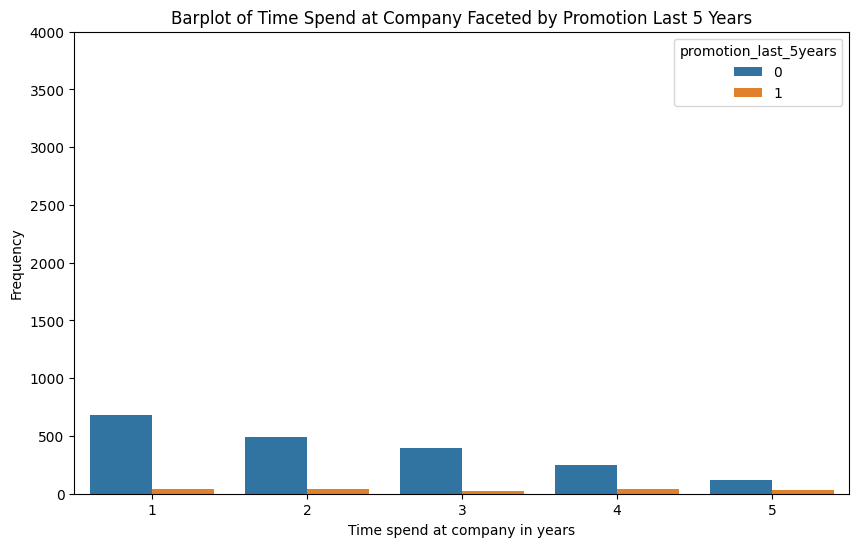

In [ ]:
# Bar plot of 'time_spend_company' faceted by 'promotion_last_5years'
plt.figure(figsize=(10, 6))
sns.countplot(x='time_spend_company', data=hrm, hue='promotion_last_5years')
plt.xlabel("Time spend at company in years")
plt.ylabel("Frequency")
plt.title("Barplot of Time Spend at Company Faceted by Promotion Last 5 Years")
plt.ylim(0, 4000)  # Set y-axis limits
plt.show()

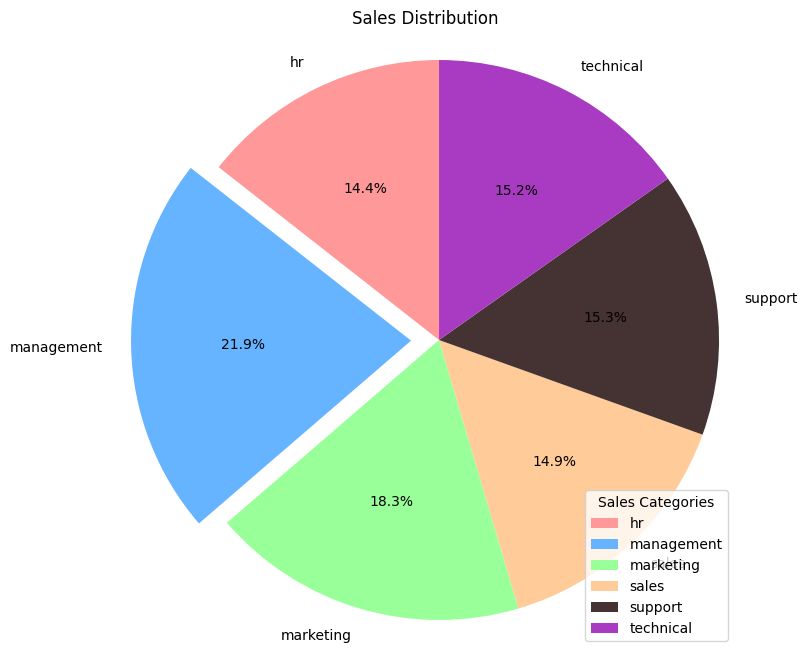

In [ ]:
#Piechart of 'Sales Distribution'
sales_data = hrm.groupby('sales').size()
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99','#443332','#A83BC2']
explode = (0, 0.1, 0, 0, 0,0)
plt.pie(sales_data, labels=sales_data.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title("Sales Distribution")
plt.axis('equal')
plt.legend(sales_data.index, title="Sales Categories",loc='lower right')
plt.show()

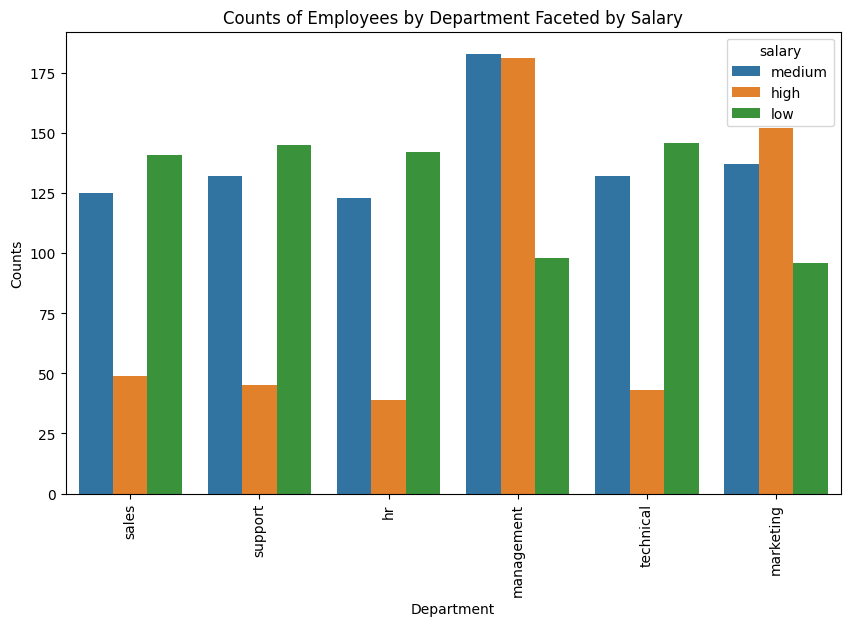

In [ ]:
# Bar plot of 'sales' faceted by 'salary'
plt.figure(figsize=(10, 6))
sns.countplot(x='sales', data=hrm, hue='salary')
plt.xlabel("Department")
plt.ylabel("Counts")
plt.title("Counts of Employees by Department Faceted by Salary")
plt.xticks(rotation=90)
plt.show()

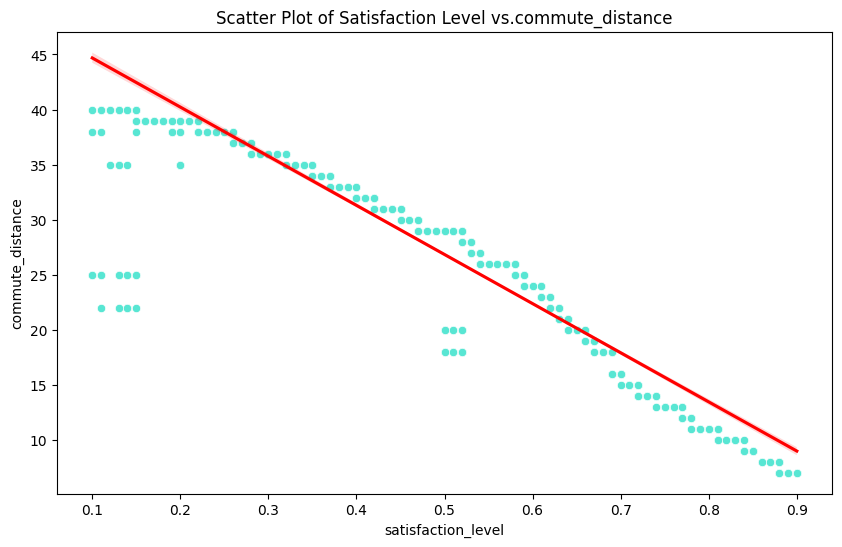

In [ ]:
#Scatter Plot of Satisfaction Level vs.Commute_distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hrm['satisfaction_level'], y=hrm['commute_distance'],c="#58E6D3")
plt.xlabel("Satisfaction Level")
plt.ylabel("commute_distance")
plt.title("Scatter Plot of Satisfaction Level vs.commute_distance")
sns.regplot(x=hrm['satisfaction_level'], y=hrm['commute_distance'], scatter=False, color='r')
plt.show()

In [ ]:
salary_mapping = {"low": 1, "medium": 2, "high": 3}
hrm['salary'] = hrm['salary'].map(salary_mapping)
hrm.dtypes

number_project             int64
average_monthly_hours      int64
salary                     int64
satisfaction_level       float64
work_accident              int64
left                       int64
time_spend_company         int64
sales                     object
promotion_last_5years      int64
Training Hours             int64
commute_distance           int64
overtime_hours             int64
dtype: object

**DATA MODELING**

In [ ]:
# Define features and target for Linear regression
X_reg = hrm.drop(columns=['satisfaction_level','sales','promotion_last_5years',
                          'Training Hours'])
y_reg = hrm['satisfaction_level']
# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,
                    y_reg, test_size=0.2, random_state=42)
# Create and train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)
# Make predictions
y_pred_reg = regression_model.predict(X_test_reg)
# Evaluate the model
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r_squared_reg = r2_score(y_test_reg, y_pred_reg)
print("Linear Regression Mean Squared Error:", round(mse_reg, 4))
print(" Linear Regression R-squared:", round(r_squared_reg, 4))

Linear Regression Mean Squared Error: 0.0023
 Linear Regression R-squared: 0.9333


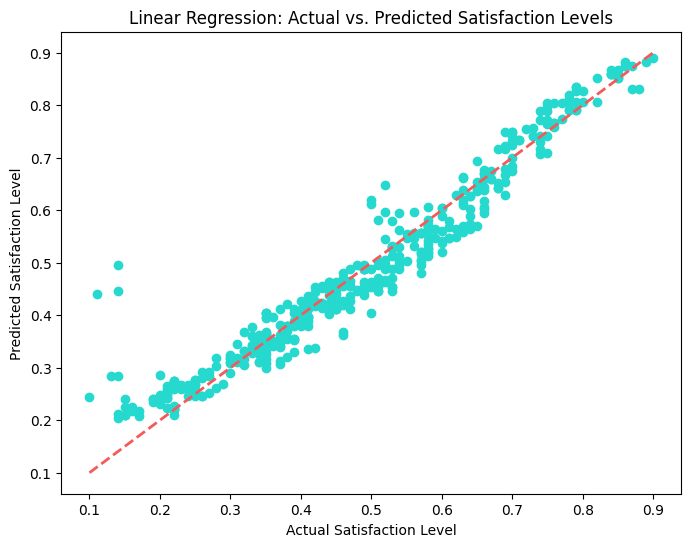

In [ ]:
# Plot the regression results
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg,c='#26D9CE')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='#F35B5B',linestyle='--', lw=2)
plt.xlabel("Actual Satisfaction Level")
plt.ylabel("Predicted Satisfaction Level")
plt.title("Linear Regression: Actual vs. Predicted Satisfaction Levels")
plt.show()

Random Forest Regression Mean Squared Error: 0.0004
Random Forest Regression R-squared: 0.9896


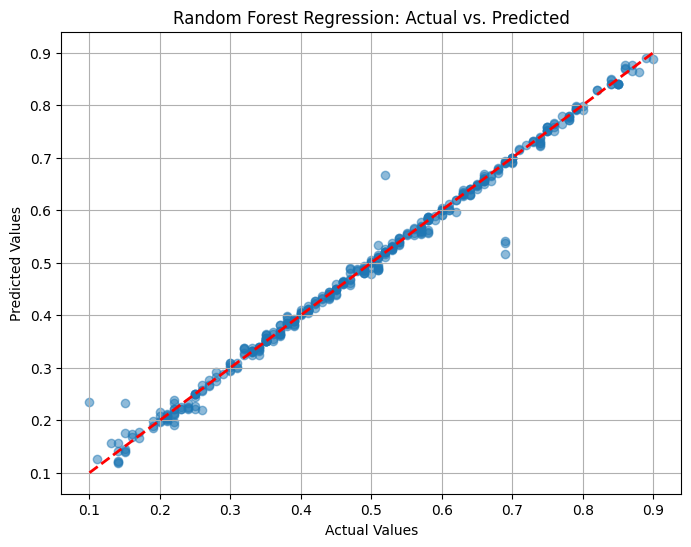

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
# Create and train the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
# Make predictions on the test set
rf_reg_predictions = rf_reg.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, rf_reg_predictions)
r2 = r2_score(y_test, rf_reg_predictions)
# Print the evaluation metrics
print(f"Random Forest Regression Mean Squared Error: {mse:.4f}")
print(f"Random Forest Regression R-squared: {r2:.4f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_reg_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs. Predicted')
plt.grid(True)
# Show the plot
plt.show()

Gradient Boosting Regression Mean Squared Error: 0.0003
Gradient Boosting Regression R-squared: 0.9924


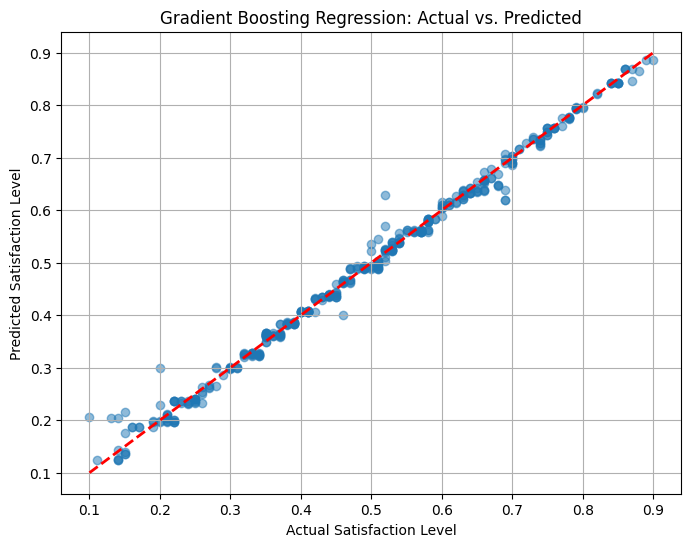

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
# Make predictions on the test set
gb_reg_predictions = gb_reg.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, gb_reg_predictions)
r2 = r2_score(y_test, gb_reg_predictions)
# Print the evaluation metrics
print(f"Gradient Boosting Regression Mean Squared Error: {mse:.4f}")
print(f"Gradient Boosting Regression R-squared: {r2:.4f}")
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_reg_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Satisfaction Level')
plt.ylabel('Predicted Satisfaction Level')
plt.title('Gradient Boosting Regression: Actual vs. Predicted')
plt.grid(True)
# Show the plot
plt.show()

**MODELING FOR CATEGORICAL COLUMN "LEFT"**

In [ ]:
# Convert the 'left' column to a categorical variable
hrm['left'] = hrm['left'].astype('category')
# Split the data into features (X) and the target variable (y)
X = hrm.drop(columns=['left','sales','promotion_last_5years','Training Hours'])
y = hrm['left']
# Split the data into training and testing sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 1. Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)
print("Logistic Regression Accuracy:", logistic_reg_accuracy)
# 2. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)
# 3. Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8056872037914692
Random Forest Classifier Accuracy: 0.7890995260663507
Gradient Boosting Classifier Accuracy: 0.8127962085308057


In [ ]:
class_labels = ['Not Left', 'Left']
# Calculate the confusion matrix for Logistic Regression
logistic_reg_confusion_matrix = confusion_matrix(y_test, logistic_reg_predictions)
confusion_matrix_formatted = pd.DataFrame(logistic_reg_confusion_matrix, index=class_labels, columns=class_labels)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_formatted)
# Calculate the confusion matrix for Random Forest Classifier
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print("Random Forest Classifier Confusion Matrix:")
rf_matrix_formatted = pd.DataFrame(rf_confusion_matrix, index=class_labels, columns=class_labels)
print(rf_matrix_formatted)
# Calculate the confusion matrix for Gradient Boosting Classifier
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)
gb_matrix_formatted = pd.DataFrame(gb_confusion_matrix, index=class_labels, columns=class_labels)
print("Gradient Boosting Classifier Confusion Matrix:")
print(gb_matrix_formatted)

Logistic Regression Confusion Matrix:
          Not Left  Left
Not Left       179    54
Left            28   161
Random Forest Classifier Confusion Matrix:
          Not Left  Left
Not Left       176    57
Left            32   157
Gradient Boosting Classifier Confusion Matrix:
          Not Left  Left
Not Left       167    66
Left            13   176
